# Complex Networks Metrics Applied to Barcelona Transportation

### Balthazar Paixão

December 2023


### Assignment

#### In this assignment you must install and get familiar with the NetworkX library for network analysis. You must choose at least one network available in The Colorado Index of Complex Networks (ICON) repository (https://icon.colorado.edu/#!/), and compare it with networks created by 3 network models: Random, WS and BA, using the following characteristics: degree distribuition, distance and clustering. Prepare a report and submit the report in this assignment.


### [Barcelona Transportation] (https://github.com/bstabler/TransportationNetworks/blob/master/Barcelona)

#### The chosen network is a directed network of the public transportation system of Barcelona, Spain. The network contains 1,1020 nodes and 2522 edges. The nodes represent the bus stops and the edges represent the bus lines. The network is directed because the bus lines have a direction of travel. The network is weighted because the edges have a weight that represents the time it takes to travel along the edge.

- Zones: 110
- Nodes: 1020
- Links: 2522
- Trips: 184679.561


In [1]:
# libs imports

from random import sample
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
filename = "../../../data/2023_3/Barcelona_flow.tntp"

In [3]:
# function to read the edges and vertex by: https://github.com/jvmaues


def load_graph(filename: str):
    edges = []
    volume = []
    cost = []
    with open(filename, "r") as f:
        f.readline()
        for line in f:
            e1, e2, e3, e4 = [x.strip() for x in line.split()]
            edges.append((e1, e2))
            volume.append(float(e3))
            cost.append(float(e4))
    return edges, volume, cost

In [4]:
edges, volume, cost = load_graph(filename)

# create the graph
G = nx.DiGraph()
G.add_edges_from(edges)
G.add_weighted_edges_from(
    [(edges[i][0], edges[i][1], volume[i]) for i in range(len(edges))]
)
# add cost
for i in range(len(edges)):
    G[edges[i][0]][edges[i][1]]["cost"] = cost[i]

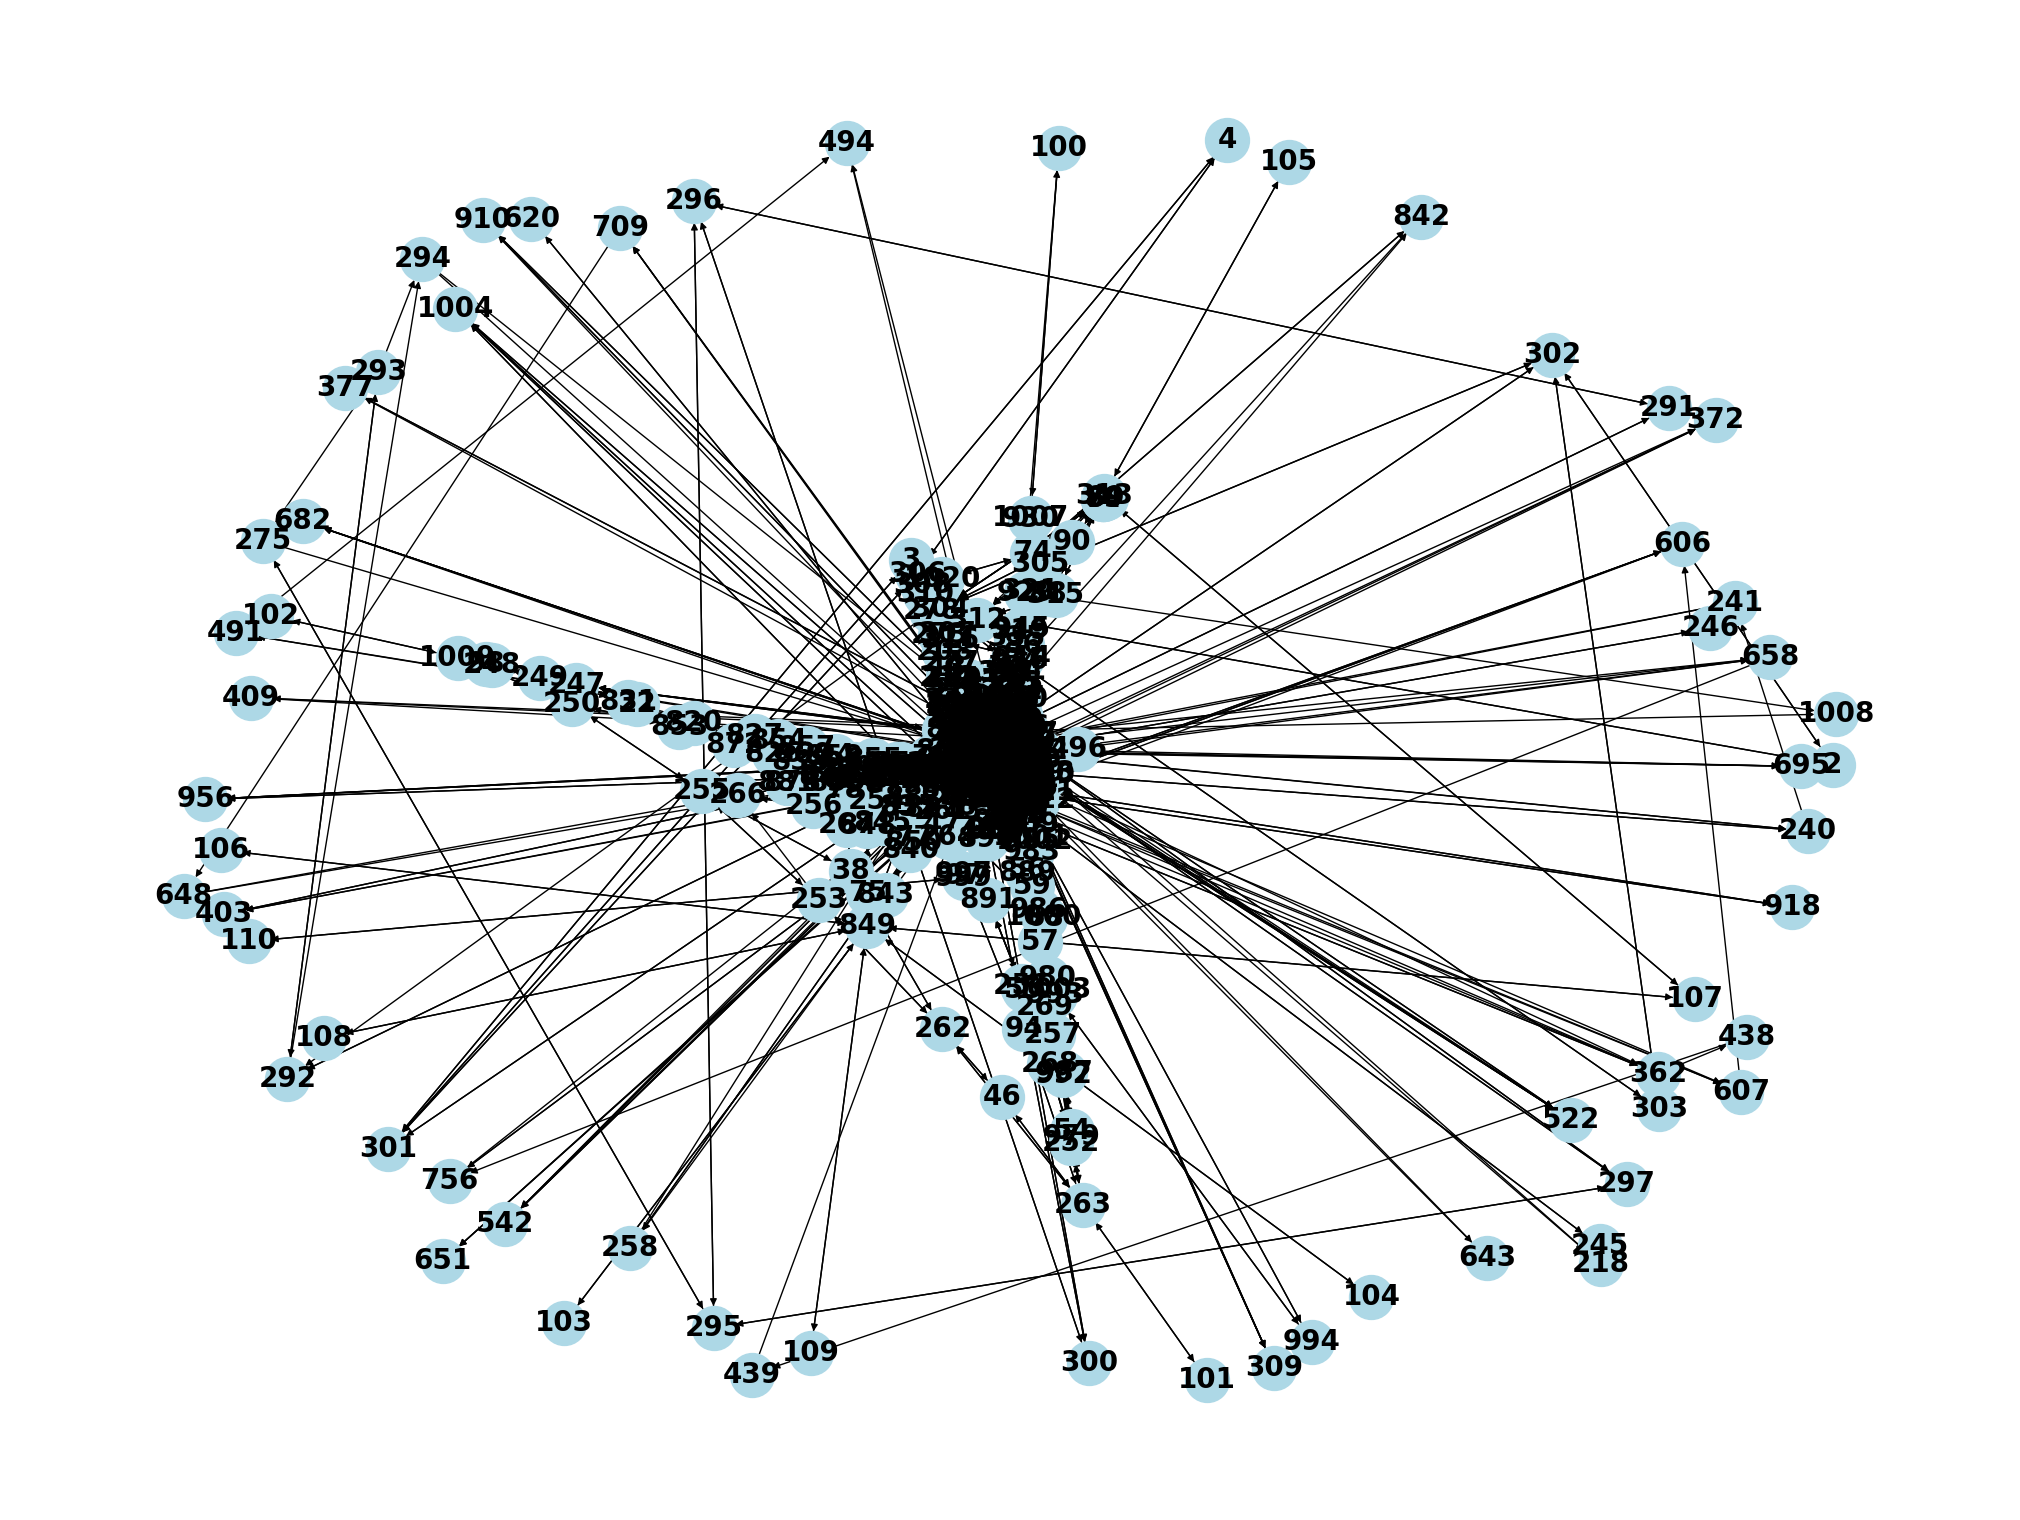

In [5]:
# Plotting the directed graph from the contries
plt.figure(figsize=(20, 15))

nx.draw(
    G,
    with_labels=True,
    font_weight="bold",
    node_size=1000,
    node_color="lightblue",
    font_size=20,
)
plt.draw()

In [11]:
nodes = len(G.nodes)
p = 0.1
nodes

930

In [9]:
G_random = nx.gnm_random_graph(nodes, len(edges), seed=57)
G_WS = nx.watts_strogatz_graph(nodes, 4, 0.3, seed=57)
G_BA = nx.barabasi_albert_graph(nodes, 4, seed=57)

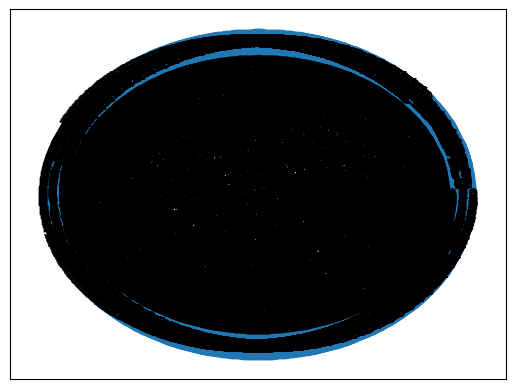

In [10]:
nx.draw_networkx(G_random, nx.layout.circular_layout(G_random))